# **SE4050 - Lab 8**

 We highly recommend you to run this notebook, so you can get familiar with the basic concepts of graphs and networks.

In this Colab, we will introduce a graph related package, [NetworkX](https://networkx.org/documentation/stable/).

NetworkX is one of the most frequently used Python packages to create, manipulate, and mine graphs.

Main parts of this tutorial are adapted from https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6

Please make a copy before you proceed.

In [1]:
# Upgrade packages
!pip install --upgrade scipy networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [2]:
# Import the NetworkX package
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Graph
NetworkX provides several classes to store different types of graphs, such as directed and undirected graph. It also provides classes to create multigraphs (both directed and undirected).

For more information, please refer to [NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).

In [3]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


## Node

Nodes (with attributes) can be easily added to NetworkX graphs.

In [4]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 5, 'label': 0}


In [5]:
G.nodes(data=True)

NodeDataView({0: {'feature': 5, 'label': 0}})

In [6]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) #(node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


## Edge

Similar to nodes, edges (with attributes) can also be easily added to NetworkX graphs.

In [7]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [8]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


## Visualization

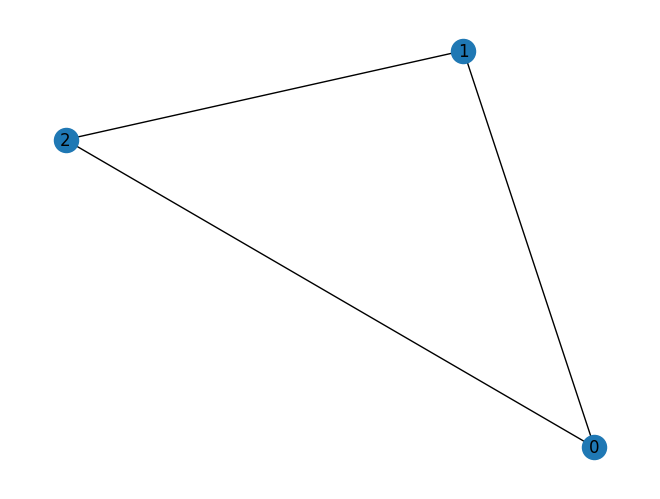

In [9]:
# Draw the graph
nx.draw(G, with_labels = True)

## Node Degree and Neighbor

In [10]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


## Random Graph creation and analysis

In [11]:
# creation of a random network with N nodes and E edges - this a erdos-renyi graph
def create(n,m):
    G = nx.gnm_random_graph(n, m, seed = random_state)
    return G

In [12]:
def degree_analysis(G):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(2, 4)


    ax1 = fig.add_subplot(axgrid[:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    plt.show()

In [13]:
random_state = np.random.RandomState(42)
N=20 #number of nodes
E=2*N #number of edges
G=create(N,E)

In [14]:
print(G.edges(nbunch=4))
print(G.adj)
print(G.edges)
print(type(G))
print(len(G.edges))

[(4, 18), (4, 9)]
{0: {11: {}, 12: {}, 2: {}, 1: {}}, 1: {11: {}, 5: {}, 19: {}, 9: {}, 0: {}}, 2: {7: {}, 19: {}, 14: {}, 0: {}}, 3: {10: {}, 13: {}, 17: {}, 7: {}, 9: {}}, 4: {18: {}, 9: {}}, 5: {1: {}}, 6: {19: {}, 7: {}, 8: {}, 17: {}, 14: {}}, 7: {6: {}, 2: {}, 11: {}, 3: {}, 13: {}, 15: {}, 10: {}}, 8: {6: {}, 17: {}, 14: {}}, 9: {15: {}, 3: {}, 1: {}, 4: {}}, 10: {14: {}, 18: {}, 3: {}, 7: {}}, 11: {1: {}, 0: {}, 16: {}, 18: {}, 7: {}, 17: {}}, 12: {17: {}, 14: {}, 0: {}}, 13: {3: {}, 16: {}, 7: {}}, 14: {10: {}, 6: {}, 2: {}, 15: {}, 12: {}, 8: {}}, 15: {9: {}, 14: {}, 7: {}}, 16: {11: {}, 13: {}, 18: {}}, 17: {6: {}, 8: {}, 3: {}, 11: {}, 12: {}}, 18: {10: {}, 11: {}, 4: {}, 16: {}}, 19: {6: {}, 2: {}, 1: {}}}
[(0, 11), (0, 12), (0, 2), (0, 1), (1, 11), (1, 5), (1, 19), (1, 9), (2, 7), (2, 19), (2, 14), (3, 10), (3, 13), (3, 17), (3, 7), (3, 9), (4, 18), (4, 9), (6, 19), (6, 7), (6, 8), (6, 17), (6, 14), (7, 11), (7, 13), (7, 15), (7, 10), (8, 17), (8, 14), (9, 15), (10, 14), 

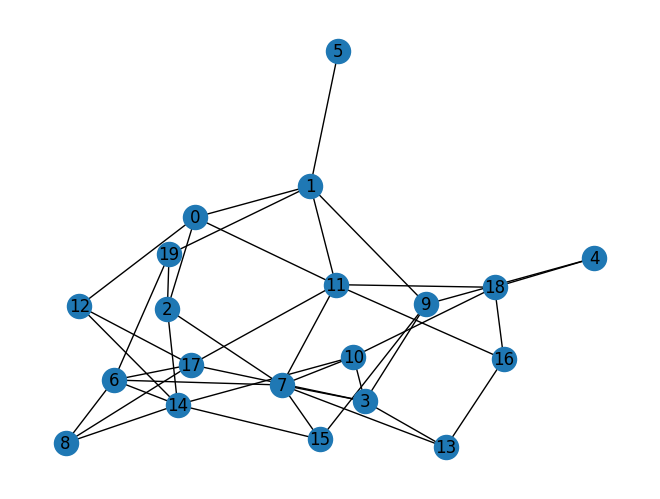

In [15]:
pos_cons = nx.spring_layout(G,seed = random_state)
nx.draw(G, pos=pos_cons,labels ={node:node for node in G.nodes()}) #spring_layout , spectral_layout
plt.draw()


In [16]:
# Get the adjacency matrix
A = nx.adjacency_matrix(G).toarray()
print("Adjacency Matrix:")
print(A)



# Get the degree matrix

# add your code here



# Get the Laplacian matrix

# add your code here

Adjacency Matrix:
[[0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0]
 [1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0]
 [0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]


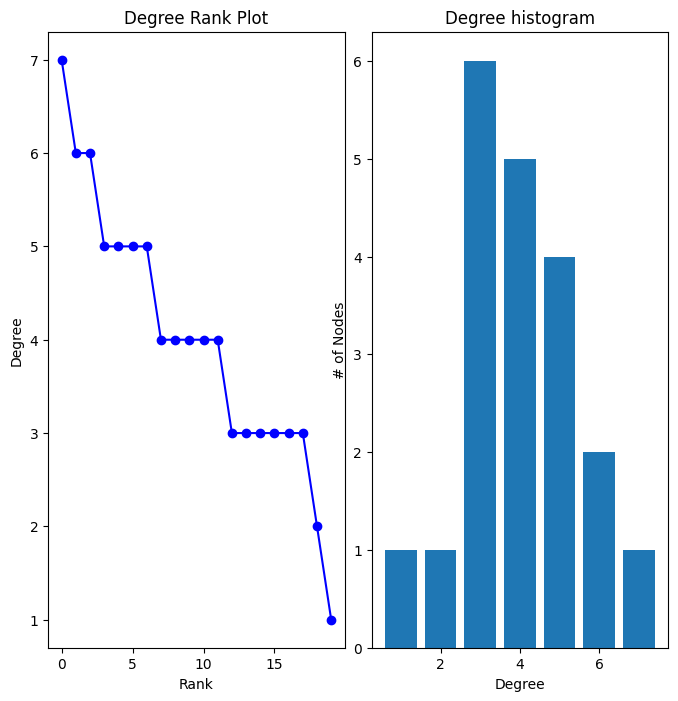

In [17]:
degree_analysis(G)

In [21]:
# calculate the graph density for the above created random graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Create a random graph with 20 nodes and probability of edge creation 0.1
N = 20
p = 0.1
random_graph = nx.erdos_renyi_graph(N, p)

In [27]:
degree_sequence = [d for n, d in random_graph.degree()]
degree_matrix = np.diag(degree_sequence)
print("Degree Matrix:\n", degree_matrix)

Degree Matrix:
 [[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


In [28]:
laplacian_matrix = nx.laplacian_matrix(random_graph).toarray()
print("Laplacian Matrix:\n", laplacian_matrix)

Laplacian Matrix:
 [[ 3  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0 -1]
 [ 0  1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  4  0  0 -1  0  0  0 -1  0 -1  0  0  0  0  0 -1  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0 -1 -1  0  0  0  0  0 -1  0  0  0  0]
 [-1  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0 -1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0 -1  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 -1  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0  0  0  0  0  2  0  0 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0]
 [-1  0  0 -1  0  0  0  0  0  0  0  0  0  0  3  0 -1  0  0  0]
 [ 0  0  0  0  0  0 -1  0  0  0  0  

In [29]:
# Calculate the number of edges and nodes
num_edges = random_graph.number_of_edges()
num_nodes = random_graph.number_of_nodes()

# Calculate the graph density using the formula: D = 2 * |E| / (|V| * (|V| - 1))
graph_density = 2 * num_edges / (num_nodes * (num_nodes - 1))

# Print the graph density
print("Graph Density:", graph_density)

Graph Density: 0.08421052631578947


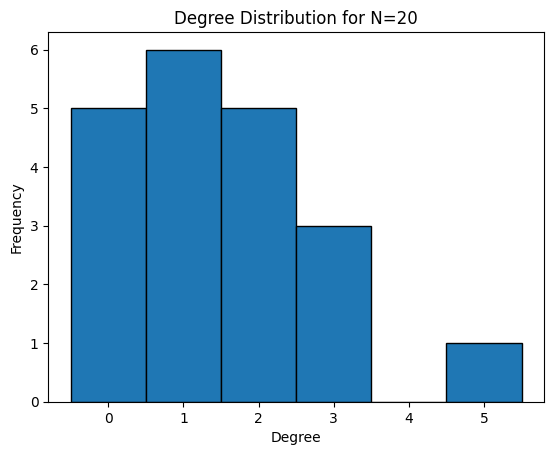

N=20, Graph Density: 0.07894736842105263


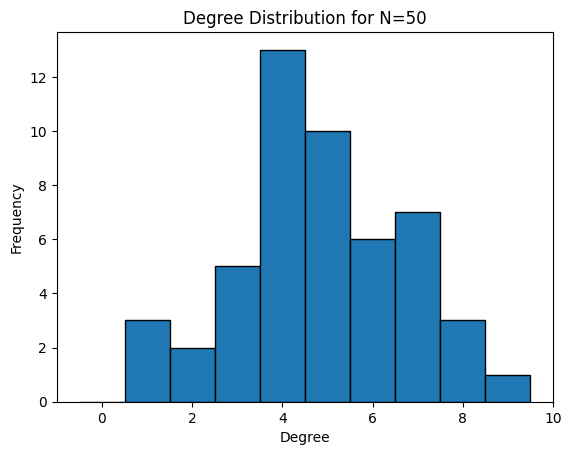

N=50, Graph Density: 0.09877551020408164


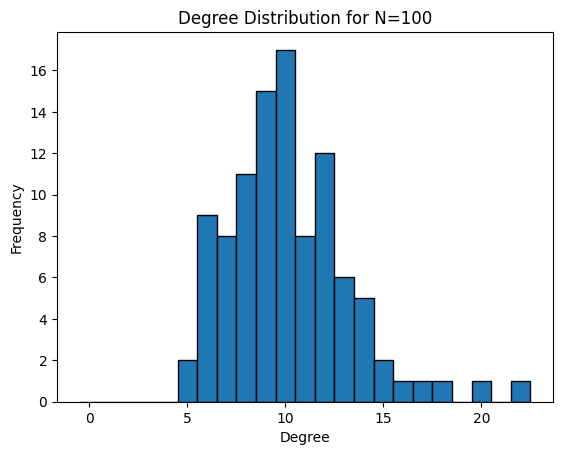

N=100, Graph Density: 0.10262626262626262


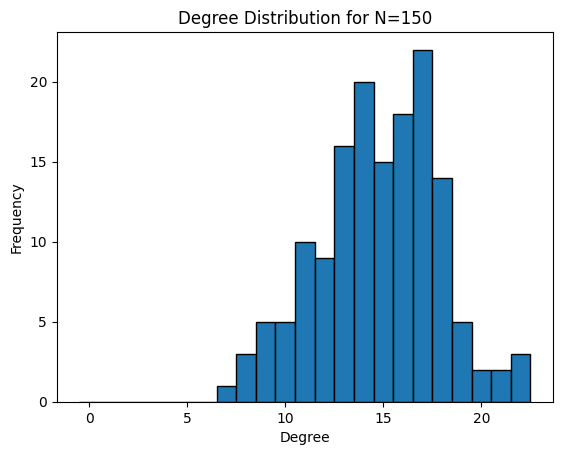

N=150, Graph Density: 0.09906040268456376


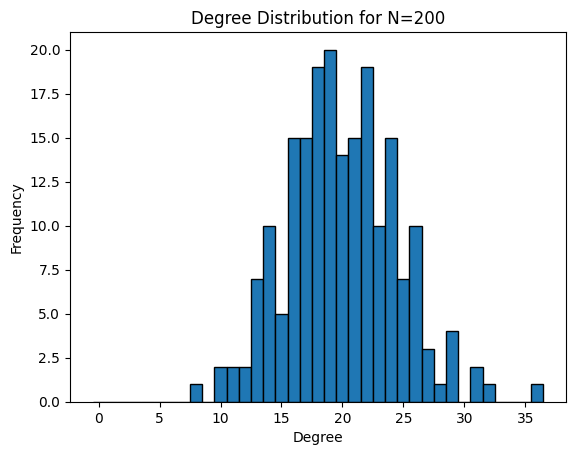

N=200, Graph Density: 0.10025125628140703


In [30]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Function to create graph and calculate degree matrix, Laplacian matrix, and density
def analyze_graph(N, p):
    G = nx.erdos_renyi_graph(N, p)
    num_edges = G.number_of_edges()
    num_nodes = G.number_of_nodes()

    # Degree matrix
    degrees = dict(G.degree())
    degree_matrix = np.diag([degrees[node] for node in G.nodes()])

    # Laplacian matrix
    laplacian_matrix = nx.laplacian_matrix(G).toarray()

    # Graph density
    graph_density = 2 * num_edges / (num_nodes * (num_nodes - 1))

    # Degree distribution plot
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, bins=range(max(degree_sequence) + 2), edgecolor="black", align='left')
    plt.title(f'Degree Distribution for N={N}')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

    print(f'N={N}, Graph Density: {graph_density}')
    return degree_matrix, laplacian_matrix, graph_density

# Analyze graph for multiple values of N
for N in [20, 50, 100, 150, 200]:
    analyze_graph(N, p=0.1)


**The differences between supervised learning, self-supervised learning and semi-supervised learning**

**Supervised Learning:** The model is trained using labeled data where each input has a corresponding output label. The model learns to map inputs to their correct labels based on the provided supervision.

**Self-Supervised Learning:** The model generates its own supervisory signal from the input data. No labels are explicitly provided; instead, the model uses data properties to generate targets.

**Semi-Supervised Learning:** The model is trained on a mix of labeled and unlabeled data. It leverages the structure of the unlabeled data to improve performance, often by making inferences based on the labeled portion.

**Transductive vs. Inductive Learning:**

**Transductive Learning:** In transductive learning, the model uses both the training and testing data during training. The model doesn’t generalize to unseen data but instead makes predictions only for the given test dataset. Example: Graph Neural Networks (GNNs) that utilize the entire graph structure during training.

**Inductive Learning:** In inductive learning, the model learns from the training data and generalizes to unseen data (i.e., it can make predictions on new, unseen samples after training). Example: General machine learning models like neural networks used in classification tasks.

**Observations:**

Graph Density: As N increases, the graph density typically decreases because the possible number of edges grows faster than the actual number of edges.

Degree Distribution: As the graph size increases, the degree distribution tends to follow a bell-curve-like shape, with most nodes having degrees near the average and fewer nodes having very low or very high degrees.

In [19]:
#increase the N from 20 to 200 and observe graph density and degree distribution and explain what you observe